In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
county_data = pd.read_csv("data/covid-19-county-level-data.csv")
county_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
county_hospital_data = pd.read_csv("data/definitive-healthcare-usa-hospital-beds.csv")

,geometry,objectid,hospital_n,hospital_t,hq_address,hq_addre_1,hq_city,hq_state,hq_zip_cod,county_nam,state_name,state_fips,cnty_fips,fips,num_licens,num_staffe,num_icu_be,bed_utiliz,potential
0,POINT (-112.0661569 33.4954978),1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,Maricopa,Arizona,4.0,13.0,4013.0,62,62,NaN,NaN,0
1,POINT (-110.9658852 32.1812634),2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,Pima,Arizona,4.0,19.0,4019.0,****,****,NaN,NaN,0
2,POINT (-119.7797421 36.7733235),3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,Fresno,California,6.0,19.0,6019.0,****,****,NaN,NaN,0
3,POINT (-72.9576103 41.2844004),4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,New Haven,Connecticut,9.0,9.0,9009.0,216,216,NaN,NaN,0
4,POINT (-75.6065325 39.7402063),5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,New Castle,Delaware,10.0,3.0,10003.0,****,****,NaN,NaN,0


In [8]:
health_rankings = pd.read_csv("data/us-county-health-rankings-2020.csv")

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,ypll_rate_aian,ypll_rate_aian_95percent_ci_low,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,95percent_ci_low_39,95percent_ci_high_39,percent_female,num_rural,percent_rural
0,1000,Alabama,NaN,81791.0,9942.794666,9840.535949,10045.053384,NaN,NaN,NaN,...,4.443264,3197324,65.413428,48517,1.061048,1.006759,1.115337,51.633032,1957932.0,40.963183
1,1001,Alabama,Autauga,791.0,8128.591190,7283.340731,8973.841649,1.0,NaN,NaN,...,2.965774,41316,74.308016,426,0.820225,0.347891,1.292558,51.448715,22921.0,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,6918.554269,7789.690790,1.0,NaN,NaN,...,4.646779,181201,83.111337,1068,0.543517,0.347271,0.739763,51.538377,77060.0,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,8782.217281,11724.929524,2.0,NaN,NaN,...,4.276355,11356,45.641252,398,1.631683,0.824903,2.438462,47.216752,18613.0,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,10344.064842,13611.014126,3.0,NaN,NaN,...,2.625000,16708,74.589286,57,0.268210,0.000000,0.807504,46.781250,15663.0,68.352607


In [14]:
#select columns needed
health_rankings = health_rankings[["fips", "state", "county", "num_deaths", "years_of_potential_life_lost_rate", "population_2", "quartile", "percent_65_and_over"]]
health_rankings["population_over_65"] = round(health_rankings["population_2"] * (health_rankings["percent_65_and_over"] / 100.0))
health_rankings.head()

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,population_2,quartile,percent_65_and_over,population_over_65
0,1000,Alabama,NaN,81791.0,9942.794666,4887871,NaN,16.917263,826894.0
1,1001,Alabama,Autauga,791.0,8128.591190,55601,1.0,15.562670,8653.0
2,1003,Alabama,Baldwin,2967.0,7354.122530,218022,1.0,20.443350,44571.0
3,1005,Alabama,Barbour,472.0,10253.573403,24881,2.0,19.420441,4832.0
4,1007,Alabama,Bibb,471.0,11977.539484,22400,3.0,16.473214,3690.0


In [15]:
#select columns needed  
county_hospital_data = county_hospital_data[["hq_city", "hq_state", "state_name", "fips", "num_licens", "num_staffe", "num_icu_be", "potential"]]
county_hospital_data.head()

,hq_city,hq_state,state_name,fips,num_licens,num_staffe,num_icu_be,potential
0,Phoenix,AZ,Arizona,4013.0,62,62,NaN,0
1,Tucson,AZ,Arizona,4019.0,****,****,NaN,0
2,Fresno,CA,California,6019.0,****,****,NaN,0
3,West Haven,CT,Connecticut,9009.0,216,216,NaN,0
4,Wilmington,DE,Delaware,10003.0,****,****,NaN,0


In [111]:
#Only get texas data
texas_county_data = county_data[(county_data["state"] == 'Texas') & (county_data["fips"] != 0)]
texas_county_hospital_data = county_hospital_data[(county_hospital_data["state_name"] == 'Texas') &  (county_hospital_data["fips"] != 0)]
texas_health_rankings = health_rankings[(health_rankings['state'] == 'Texas') & (health_rankings['fips'] != 0)]

In [112]:
#Gets counties in Texas
counties_fips = texas_county_hospital_data["fips"].unique()
counties = texas_health_rankings[texas_health_rankings["fips"].isin(counties_fips)][["fips","county"]]

In [113]:
#Gets hospital beds and icu beds counts
texas_county_hospital_data.loc[(texas_county_hospital_data.num_licens == "****"), 'num_licens'] = 0
texas_county_hospital_data.loc[(texas_county_hospital_data.num_icu_be == "****"), 'num_icu_be'] = 0
texas_county_hospital_data['num_licens'] = texas_county_hospital_data['num_licens'].astype(int)
hospital_beds = texas_county_hospital_data.groupby('fips')['num_licens'].sum()
icu_beds = texas_county_hospital_data.groupby('fips')['num_icu_be'].sum()

C:\Users\bcard\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
#Gets population for each county
county_population = texas_health_rankings[texas_health_rankings["fips"].isin(counties_fips)][['fips','population_2']]
county_over_65 = texas_health_rankings[texas_health_rankings["fips"].isin(counties_fips)][['fips','population_over_65']]

In [106]:
#Gets the count of confirmed cases and deaths from COVID
county_confirmed_cases = texas_county_data.groupby('fips')['cases'].sum()
county_deaths = texas_county_data.groupby('fips')['deaths'].sum()

632

In [136]:
counties.sort_values(['fips'], ascending = [True], inplace = True)
county_population.sort_values(['fips'], ascending = [True], inplace = True)
county_over_65.sort_values(['fips'], ascending = [True], inplace = True)

,fips,population_over_65
2567,48001,8591.0
2568,48003,1878.0
2569,48005,14218.0
2573,48013,7385.0
2574,48015,5699.0
...,...,...
2814,48495,949.0
2815,48497,10190.0
2816,48499,12142.0
2817,48501,1017.0


In [139]:
fips_beds =  []
fips_icu = []
fips_cases = []
fips_deaths= []
for fip in counties['fips'].values:
    if len(hospital_beds[hospital_beds.index == fip]) != 0:
        fips_beds.append(hospital_beds[hospital_beds.index == fip].values[0])
    else:
        fips_beds.append(0)
    
    if len(icu_beds[icu_beds.index == fip]) != 0:
        fips_icu.append(icu_beds[icu_beds.index == fip].values[0])
    else:
        fips_icu.append(0)
    
    if len(county_confirmed_cases[county_confirmed_cases.index == fip]) != 0:
        fips_cases.append(county_confirmed_cases[county_confirmed_cases.index == fip].values[0])
    else:
        fips_cases.append(0)  
        
    if len(county_deaths[county_deaths.index == fip]) != 0:
        fips_deaths.append(county_deaths[county_deaths.index == fip].values[0])
    else:
        fips_deaths.append(0)


In [142]:
fips_pop = county_population['population_2'].values
fips_65 = county_over_65['population_over_65'].values

In [151]:
HOSP_BEDS = pd.DataFrame(data = fips_beds, columns=['HOSP_BEDS'])
ICU_BEDS = pd.DataFrame(data = fips_icu, columns=['ICU_BEDS'])
CASES = pd.DataFrame(data = fips_cases, columns=['CASES'])
DEATHS = pd.DataFrame(data = fips_deaths, columns=['DEATHS'])
POPULATION= pd.DataFrame(data = fips_pop, columns=['POPULATION'])
POP_OVER_65 = pd.DataFrame(data = fips_65, columns=['POP_OVER_65'])
counties = counties.reset_index(drop=True)
all_county_data = pd.concat([counties ,HOSP_BEDS, ICU_BEDS, CASES, DEATHS, POPULATION, POP_OVER_65], axis=1)

In [168]:
#Calculate more useful values such as bed to people ratio
all_county_data['BED_TO_PEOPLE_RATIO']= (all_county_data['HOSP_BEDS'] + all_county_data['ICU_BEDS']) / (all_county_data['POPULATION'])
all_county_data['INFECTED_RATIO'] = all_county_data['CASES'] / all_county_data['POPULATION']
all_county_data['HYPOTHETICAL_BEDS_IN_USE'] = all_county_data['HOSP_BEDS'] + all_county_data['ICU_BEDS'] - all_county_data['CASES']
all_county_data['HYPOTHETICAL_BEDS_AVAILABLE'] = all_county_data['HOSP_BEDS'] - all_county_data['HYPOTHETICAL_BEDS_IN_USE']
all_county_data['DEATH_RATE'] = all_county_data['DEATHS'] / all_county_data['CASES']

In [169]:
all_county_data

,fips,county,HOSP_BEDS,ICU_BEDS,CASES,DEATHS,POPULATION,POP_OVER_65,BED_TO_PEOPLE_RATIO,INFECTED_RATIO,HYPOTHETICAL_BEDS_IN_USE,HYPOTHETICAL_BEDS_AVAILABLE,DEATH_RATE
0,48001,Anderson,150,10.0,4,0,58057,8591.0,0.002756,0.000069,156.0,-6.0,0.0
1,48003,Andrews,34,0.0,6,0,18128,1878.0,0.001876,0.000331,28.0,6.0,0.0
2,48005,Angelina,470,39.0,42,0,87092,14218.0,0.005844,0.000482,467.0,3.0,0.0
3,48013,Atascosa,67,6.0,22,0,50310,7385.0,0.001451,0.000437,51.0,16.0,0.0
4,48015,Austin,32,0.0,24,0,29989,5699.0,0.001067,0.000800,8.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,48495,Winkler,19,0.0,0,0,7720,949.0,0.002461,0.000000,19.0,0.0,NaN
176,48497,Wise,49,21.0,14,0,68305,10190.0,0.001025,0.000205,56.0,-7.0,0.0
177,48499,Wood,50,0.0,4,0,45129,12142.0,0.001108,0.000089,46.0,4.0,0.0
178,48501,Yoakum,24,0.0,6,0,8591,1017.0,0.002794,0.000698,18.0,6.0,0.0


In [170]:
all_county_data.sort_values(by=['POPULATION'], ascending = False).style.background_gradient(subset=['HOSP_BEDS', 'ICU_BEDS',
                                                                'CASES', 'DEATHS', 'BED_TO_PEOPLE_RATIO',
                                                                'INFECTED_RATIO', 'DEATH_RATE'])

C:\Users\bcard\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,fips,county,HOSP_BEDS,ICU_BEDS,CASES,DEATHS,POPULATION,POP_OVER_65,BED_TO_PEOPLE_RATIO,INFECTED_RATIO,HYPOTHETICAL_BEDS_IN_USE,HYPOTHETICAL_BEDS_AVAILABLE,DEATH_RATE
74,48201,Harris,14667,1029,7477,76,4698619,494264,0.00334056,0.00159132,8219,6448,0.0101645
41,48113,Dallas,8087,469,7012,139,2637772,283154,0.00324365,0.0026583,1544,6543,0.0198232
153,48439,Tarrant,6862,400,2507,37,2084931,235187,0.00348309,0.00120244,4755,2107,0.0147587
10,48029,Bexar,6383,505,2626,75,1986049,240621,0.00346819,0.00132222,4262,2121,0.0285605
159,48453,Travis,3062,301,2856,21,1248743,123395,0.00269311,0.0022871,507,2555,0.00735294
30,48085,Collin,2347,107,1888,20,1005146,110655,0.00244144,0.00187833,566,1781,0.0105932
81,48215,Hidalgo,1413,195,413,0,865939,96025,0.00185694,0.000476939,1195,218,0
44,48121,Denton,1504,85,2158,33,859064,87414,0.00184969,0.00251204,-569,2073,0.0152919
50,48141,El Paso,2623,225,584,0,840758,103092,0.00338742,0.000694611,2264,359,0
57,48157,Fort Bend,1112,114,1845,17,787858,87128,0.00155612,0.00234179,-619,1731,0.00921409


In [217]:
beds_ratios = all_county_data.sort_values(by=['POPULATION', 'BED_TO_PEOPLE_RATIO'], ascending = False)[:25]


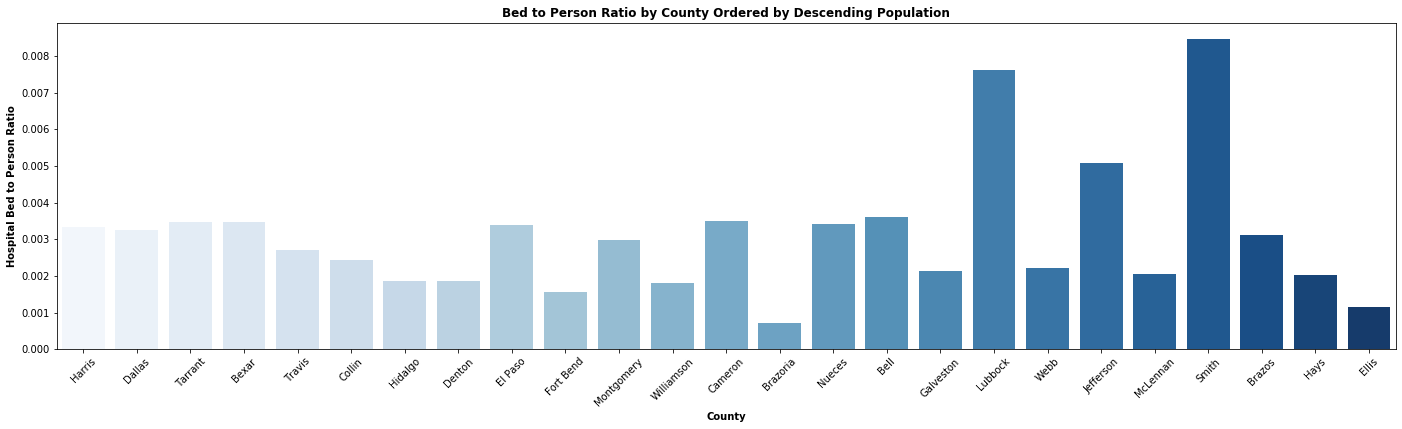

In [218]:
plt.figure(num=None, figsize=(24, 6))
fig = sns.barplot(y=beds_ratios['BED_TO_PEOPLE_RATIO'], x=beds_ratios['county'], palette='Blues')
plt.xticks(rotation=45)
plt.xlabel('County',fontweight='bold')
plt.ylabel('Hospital Bed to Person Ratio', fontweight='bold')
plt.title("Bed to Person Ratio by County Ordered by Descending Population", fontweight='bold')
plt.savefig("bedtopersonratio.png")

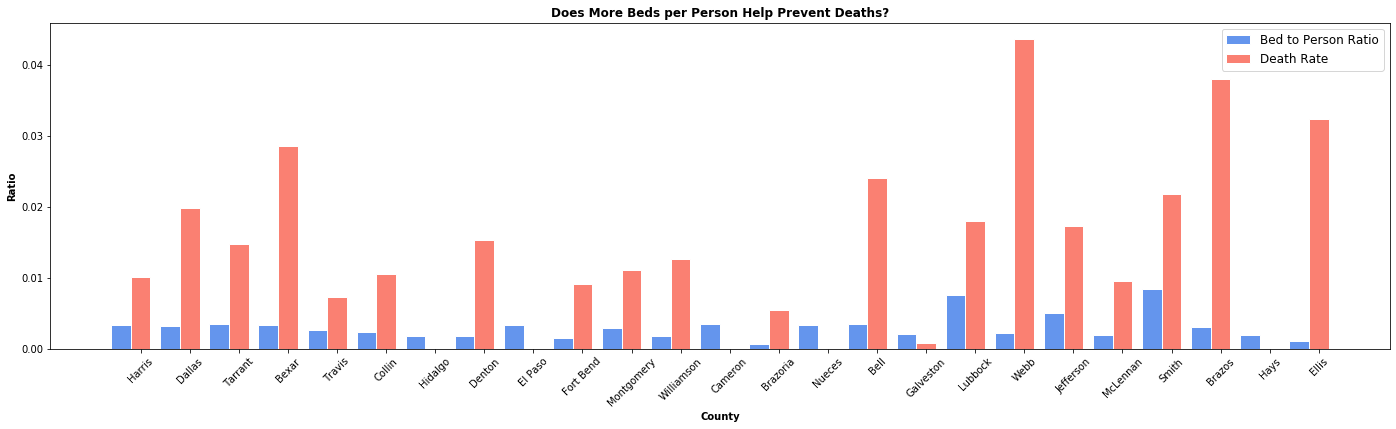

In [231]:
plt.figure(num=None, figsize=(24, 6))
barWidth = 0.4
bars1 = beds_ratios['BED_TO_PEOPLE_RATIO']
bars2 = beds_ratios['DEATH_RATE']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='cornflowerblue', width=barWidth, edgecolor='white', label='Bed to Person Ratio')
plt.bar(r2, bars2, color='salmon', width=barWidth, edgecolor='white', label='Death Rate')

# Add xticks on the middle of the group bars
plt.xlabel('County', fontweight='bold')
plt.ylabel('Ratio', fontweight='bold')
plt.title('Does More Beds per Person Help Prevent Deaths?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], beds_ratios['county'], rotation = 45)
 
# Create legend & Show graphics
plt.legend(loc=1, prop={'size': 12})
plt.savefig("bedsHelp.png")
plt.show()


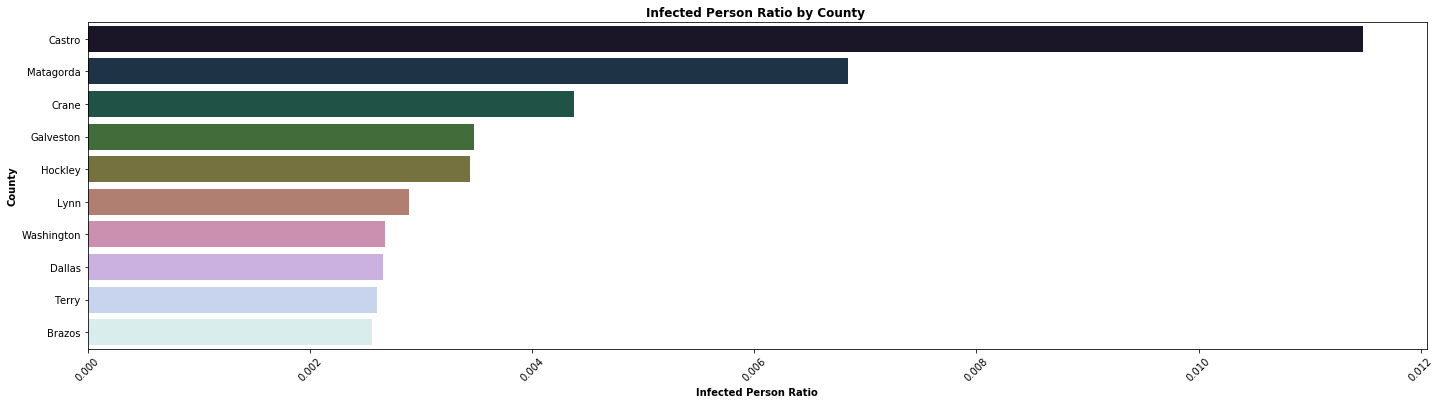

In [210]:
infect_rat = all_county_data.sort_values(by=['INFECTED_RATIO'], ascending=False).head(10)
plt.figure(num=None, figsize=(24, 6))
fig = sns.barplot(x=infect_rat['INFECTED_RATIO'], y=infect_rat['county'], palette='cubehelix', orient ="h")
plt.xticks(rotation=45)
plt.xlabel('Infected Person Ratio',fontweight='bold')
plt.ylabel('County', fontweight='bold')
plt.title("Infected Person Ratio by County ", fontweight='bold')
plt.savefig('infectedPersonRatio.png')

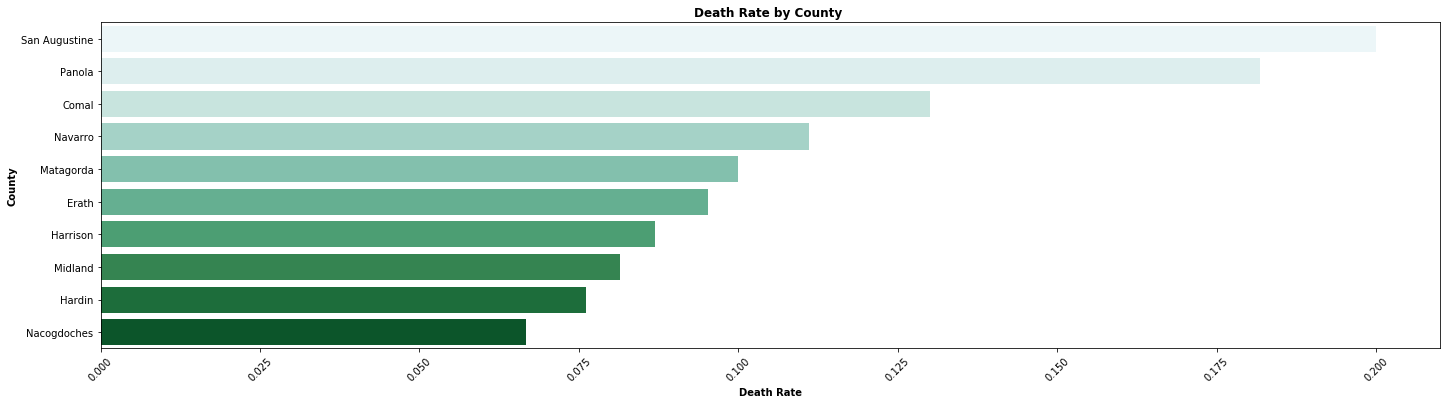

In [211]:
death_rat = all_county_data.sort_values(by=['DEATH_RATE'], ascending=False).head(10)
plt.figure(num=None, figsize=(24, 6))
fig = sns.barplot(x=death_rat['DEATH_RATE'], y=death_rat['county'], palette='BuGn', orient ="h")
plt.xticks(rotation=45)
plt.xlabel('Death Rate',fontweight='bold')
plt.ylabel('County', fontweight='bold')
plt.title("Death Rate by County ", fontweight='bold')
plt.savefig('deathRate.png')